In [4]:
#imort packages
import numpy as np # linear algebra
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn 
from sklearn.model_selection import train_test_split 
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import plot_tree
from sklearn import metrics
from sklearn.metrics import confusion_matrix
import random
from sklearn.metrics import classification_report
import imblearn
from sklearn.metrics import roc_auc_score, accuracy_score, confusion_matrix, ConfusionMatrixDisplay, f1_score,fbeta_score
,precision_recall_curve,auc
from collections import Counter
from imblearn.over_sampling import SMOTE 
from sklearn.pipeline import make_pipeline
from sklearn.svm import SVC
import pandas as pd
import researchpy as rp
import scipy.stats as stats
from category_encoders.ordinal import OrdinalEncoder
from imblearn.under_sampling import NearMiss
from sklearn.feature_selection import SelectKBest, chi2,mutual_info_classif
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import BernoulliNB , ComplementNB, CategoricalNB
from imblearn.metrics import geometric_mean_score


# (0) desprective statistics

In [6]:
dataset = pd.read_csv('C:/Users/kobig/Seminar_project/fraud_oracle.csv')
dataset

,Month,WeekOfMonth,DayOfWeek,Make,AccidentArea,DayOfWeekClaimed,MonthClaimed,WeekOfMonthClaimed,Sex,MaritalStatus,...,AgeOfVehicle,AgeOfPolicyHolder,PoliceReportFiled,WitnessPresent,AgentType,NumberOfSuppliments,AddressChange_Claim,NumberOfCars,Year,BasePolicy
0,Dec,5,Wednesday,Honda,Urban,Tuesday,Jan,1,Female,Single,...,3 years,26 to 30,No,No,External,none,1 year,3 to 4,1994,Liability
1,Jan,3,Wednesday,Honda,Urban,Monday,Jan,4,Male,Single,...,6 years,31 to 35,Yes,No,External,none,no change,1 vehicle,1994,Collision
2,Oct,5,Friday,Honda,Urban,Thursday,Nov,2,Male,Married,...,7 years,41 to 50,No,No,External,none,no change,1 vehicle,1994,Collision
3,Jun,2,Saturday,Toyota,Rural,Friday,Jul,1,Male,Married,...,more than 7,51 to 65,Yes,No,External,more than 5,no change,1 vehicle,1994,Liability
4,Jan,5,Monday,Honda,Urban,Tuesday,Feb,2,Female,Single,...,5 years,31 to 35,No,No,External,none,no change,1 vehicle,1994,Collision
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15415,Nov,4,Friday,Toyota,Urban,Tuesday,Nov,5,Male,Married,...,6 years,31 to 35,No,No,External,none,no change,1 vehicle,1996,Collision
15416,Nov,5,Thursday,Pontiac,Urban,Friday,Dec,1,Male,Married,...,6 years,31 to 35,No,No,External,more than 5,no change,3 to 4,1996,Liability
15417,Nov,5,Thursday,Toyota,Rural,Friday,Dec,1,Male,Single,...,5 years,26 to 30,No,No,External,1 to 2,no change,1 vehicle,1996,Collision
15418,Dec,1,Monday,Toyota,Urban,Thursday,Dec,2,Female,Married,...,2 years,31 to 35,No,No,External,more than 5,no change,1 vehicle,1996,All Perils


#### ****desprective statisitc - numeric features****

In [7]:
dataset.describe()


,WeekOfMonth,WeekOfMonthClaimed,Age,FraudFound_P,PolicyNumber,RepNumber,Deductible,DriverRating,Year
count,15420.000000,15420.000000,15420.000000,15420.000000,15420.000000,15420.000000,15420.000000,15420.000000,15420.000000
mean,2.788586,2.693969,39.855707,0.059857,7710.500000,8.483268,407.704280,2.487808,1994.866472
std,1.287585,1.259115,13.492377,0.237230,4451.514911,4.599948,43.950998,1.119453,0.803313
min,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,300.000000,1.000000,1994.000000
25%,2.000000,2.000000,31.000000,0.000000,3855.750000,5.000000,400.000000,1.000000,1994.000000
50%,3.000000,3.000000,38.000000,0.000000,7710.500000,8.000000,400.000000,2.000000,1995.000000
75%,4.000000,4.000000,48.000000,0.000000,11565.250000,12.000000,400.000000,3.000000,1996.000000
max,5.000000,5.000000,80.000000,1.000000,15420.000000,16.000000,700.000000,4.000000,1996.000000


#### ****desprective statisitc - qualtive features****

In [4]:
dataset.describe(include=['object'])

,Month,DayOfWeek,Make,AccidentArea,DayOfWeekClaimed,MonthClaimed,Sex,MaritalStatus,Fault,PolicyType,...,PastNumberOfClaims,AgeOfVehicle,AgeOfPolicyHolder,PoliceReportFiled,WitnessPresent,AgentType,NumberOfSuppliments,AddressChange_Claim,NumberOfCars,BasePolicy
count,15420,15420,15420,15420,15420,15420,15420,15420,15420,15420,...,15420,15420,15420,15420,15420,15420,15420,15420,15420,15420
unique,12,7,19,2,8,13,2,4,2,9,...,4,8,9,2,2,2,4,5,5,3
top,Jan,Monday,Pontiac,Urban,Monday,Jan,Male,Married,Policy Holder,Sedan - Collision,...,2 to 4,7 years,31 to 35,No,No,External,none,no change,1 vehicle,Collision
freq,1411,2616,3837,13822,3757,1446,13000,10625,11230,5584,...,5485,5807,5593,14992,15333,15179,7047,14324,14316,5962


#### intresting variablas

In [ ]:
print(dataset['FraudFound_P'].value_counts(),'\n') # 923 frauds and 14497 not fraud - outcome
print(dataset['AgeOfPolicyHolder'].value_counts(),'\n')
print(dataset['WitnessPresent'].value_counts(), '\n')
print(dataset['PoliceReportFiled'].value_counts())


In [ ]:
# creating data for the plot
data_FraudFound_P = pd.DataFrame({'category':['Not Fraud', 'Fraud'],
                     'counts': dataset['FraudFound_P'].value_counts().values,
                     'percentage': [round(sum(dataset.FraudFound_P == 0)/len(dataset), 3)*100 ,
                                    round(sum(dataset.FraudFound_P == 1)/len(dataset), 3)*100]
                    })
 

plt.figure(figsize=(8,8))
colors_list = ['tab:blue', 'tab:red']
graph = plt.bar(data_FraudFound_P.category,data_FraudFound_P.counts, color = colors_list)
plt.title("Figure 1: Percentage of Fraud and not fraud")

i = 0
for p in graph:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy()
    plt.text(x+width/2,
             y+height*1.01,
             str(data_FraudFound_P.percentage[i])+'%',
             ha='center',
             weight='bold')
    i+=1
plt.show()

#### bar plots Fraud againg important variabls

In [ ]:
dataset.columns

In [ ]:
sns.catplot(y="Make", hue="FraudFound_P", kind="count",
            palette="pastel", edgecolor=".6",
            data=dataset).set(title = "Make and Fraud")
plt.show()


In [ ]:
sns.catplot(x="AccidentArea", hue="FraudFound_P", kind="count",
            palette="pastel", edgecolor=".6",
            data=dataset).set(title = "AccidentArea and Fraud")
plt.show()


In [ ]:
sns.catplot(x="Sex", hue="FraudFound_P", kind="count",
            palette="pastel", edgecolor=".6",
            data=dataset).set(title = "Sex and Fraud")
plt.show()


In [ ]:
sns.catplot(x="Month", hue="FraudFound_P", kind="count",
            palette="pastel", edgecolor=".6",
            data=dataset).set(title = "Month and Fraud")
plt.show()


In [ ]:
sns.catplot(x="MaritalStatus", hue="FraudFound_P", kind="count",
            palette="pastel", edgecolor=".6",
            data=dataset).set(title = "Sex and Fraud")
plt.show()


In [ ]:
sns.catplot(x="DriverRating", hue="FraudFound_P", kind="count",
            palette="pastel", edgecolor=".6",
            data=dataset).set(title = "DriverRating and Fraud")
plt.show()


In [ ]:
sns.catplot(x="Deductible", hue="FraudFound_P", kind="count",
            palette="pastel", edgecolor=".6",
            data=dataset).set(title = "deductible and Fraud")
plt.show()

In [ ]:
sns.catplot(y="AgeOfVehicle", hue="FraudFound_P", kind="count",
            palette="pastel", edgecolor=".6",
            data=dataset).set(title = "AgeOfVehicle and Fraud")
plt.show()

In [ ]:
sns.catplot(x="WitnessPresent", hue="FraudFound_P", kind="count",
            palette="pastel", edgecolor=".6",
            data=dataset).set(title = "WitnessPresent and Fraud")
plt.show()

In [ ]:
sns.catplot(x="AgentType", hue="FraudFound_P", kind="count",
            palette="pastel", edgecolor=".6",
            data=dataset).set(title = "AgentType and Fraud")
plt.show()

In [ ]:
sns.catplot(x="PastNumberOfClaims", hue="FraudFound_P", kind="count",
            palette="pastel", edgecolor=".6",
            data=dataset).set(title = "PastNumberOfClaims and Fraud")
plt.show()

In [ ]:
sns.catplot(x="PoliceReportFiled", hue="FraudFound_P", kind="count",
            palette="pastel", edgecolor=".6",
            data=dataset).set(title = "PoliceReportFiled and Fraud")
plt.show()

In [ ]:
dataset.columns[~dataset.columns.isin(["Age", 'Month'])]

### χ^2 test

In [ ]:
col_names = dataset.columns[~dataset.columns.isin(['Age', 'FraudFound_P'])]
for i in dataset.columns[~dataset.columns.isin(['Age', 'FraudFound_P'])]:
    col_names = col_names[col_names != i]
    for j in col_names:
        crosstab, test_results, expected = rp.crosstab(dataset[i], dataset[j],
                                               test= "chi-square",
                                               expected_freqs= True,
                                               prop= "cell")
        if test_results['results'][1] < 0.05:
            print(i + ' ' + j + ':')
            print(test_results)
            print('\n')
    print('****** new ******')
    

In [ ]:
for i in dataset.columns[~dataset.columns.isin(['Age', 'FraudFound_P'])]:
    crosstab, test_results, expected = rp.crosstab(dataset[i], dataset['FraudFound_P'],
                                               test= "chi-square",
                                               expected_freqs= True,
                                               prop= "cell")
    if test_results['results'][1] < 0.05:
        print(i + ':')
        print(test_results)
        print('\n')

    

In [ ]:
for i in dataset.columns[~dataset.columns.isin(['Age', 'FraudFound_P'])]:
    crosstab, test_results, expected = rp.crosstab(dataset[i], dataset['FraudFound_P'],
                                               test= "chi-square",
                                               expected_freqs= True,
                                               prop= "cell")
    if test_results['results'][1] > 0.05:
        print(i + ':')
        print(test_results)
        print('\n')


In [ ]:
pd.crosstab(dataset.Sex, dataset.FraudFound_P)


In [ ]:
pd.crosstab(dataset.Sex, dataset.FraudFound_P, normalize = 'columns')

In [ ]:
pd.crosstab(dataset.AccidentArea, dataset.FraudFound_P)

In [ ]:
pd.crosstab(dataset.AccidentArea, dataset.FraudFound_P, normalize = 'columns')

In [ ]:
pd.crosstab(dataset.VehicleCategory, dataset.FraudFound_P)

In [ ]:
pd.crosstab(dataset.VehicleCategory, dataset.FraudFound_P, normalize = 'columns')

In [ ]:
pd.crosstab(dataset.VehicleCategory, dataset.FraudFound_P, normalize = 'columns')

In [ ]:
for i in dataset.columns[~dataset.columns.isin(['Age', 'FraudFound_P'])]:
    print(pd.crosstab(dataset[i], dataset.FraudFound_P))
    print(pd.crosstab(dataset[i], dataset.FraudFound_P, normalize = 'columns'))
   

# (1) Data preproccesing 

#### changing the zero values to nan values in columns: Age, DayOfWeekClaimed, weekclaimed

In [3]:
#Age
print(sum(dataset['Age']  == 0))
dataset.loc[dataset['Age'] == 0, 'Age'] = np.nan

#DayOfWeekClaimed
print(dataset['DayOfWeekClaimed'].unique())
dataset[dataset['DayOfWeekClaimed'] == '0'] # obs 1516 has a 
dataset.loc[dataset['DayOfWeekClaimed'] == 0, 'DayOfWeekClaimed'] = np.nan

#MonthClaimed
print(sum(dataset['MonthClaimed']  == '0'))
dataset.loc[dataset['MonthClaimed'] == '0', 'DayOfWeekClaimed'] = np.nan

320
['Tuesday' 'Monday' 'Thursday' 'Friday' 'Wednesday' 'Saturday' 'Sunday'
 '0']
1


### function for dropping Irrelevant_colmuns - PolicyType, PolicyNumber


In [8]:
def Irrelevant_col(df , drop):
    df.drop(drop, axis=1, inplace=True)


#drop in my data set    
drop = ["PolicyType","PolicyNumber"] 
dataset_new = dataset
Irrelevant_col(dataset_new, drop)

dataset_new

,Month,WeekOfMonth,DayOfWeek,Make,AccidentArea,DayOfWeekClaimed,MonthClaimed,WeekOfMonthClaimed,Sex,MaritalStatus,...,AgeOfVehicle,AgeOfPolicyHolder,PoliceReportFiled,WitnessPresent,AgentType,NumberOfSuppliments,AddressChange_Claim,NumberOfCars,Year,BasePolicy
0,Dec,5,Wednesday,Honda,Urban,Tuesday,Jan,1,Female,Single,...,3 years,26 to 30,No,No,External,none,1 year,3 to 4,1994,Liability
1,Jan,3,Wednesday,Honda,Urban,Monday,Jan,4,Male,Single,...,6 years,31 to 35,Yes,No,External,none,no change,1 vehicle,1994,Collision
2,Oct,5,Friday,Honda,Urban,Thursday,Nov,2,Male,Married,...,7 years,41 to 50,No,No,External,none,no change,1 vehicle,1994,Collision
3,Jun,2,Saturday,Toyota,Rural,Friday,Jul,1,Male,Married,...,more than 7,51 to 65,Yes,No,External,more than 5,no change,1 vehicle,1994,Liability
4,Jan,5,Monday,Honda,Urban,Tuesday,Feb,2,Female,Single,...,5 years,31 to 35,No,No,External,none,no change,1 vehicle,1994,Collision
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15415,Nov,4,Friday,Toyota,Urban,Tuesday,Nov,5,Male,Married,...,6 years,31 to 35,No,No,External,none,no change,1 vehicle,1996,Collision
15416,Nov,5,Thursday,Pontiac,Urban,Friday,Dec,1,Male,Married,...,6 years,31 to 35,No,No,External,more than 5,no change,3 to 4,1996,Liability
15417,Nov,5,Thursday,Toyota,Rural,Friday,Dec,1,Male,Single,...,5 years,26 to 30,No,No,External,1 to 2,no change,1 vehicle,1996,Collision
15418,Dec,1,Monday,Toyota,Urban,Thursday,Dec,2,Female,Married,...,2 years,31 to 35,No,No,External,more than 5,no change,1 vehicle,1996,All Perils


### 1.(a) null values of age, day of week - replacing with mean

In [9]:
# removing rows
dataset_new_rem = dataset_new.dropna(subset = ['Age'])
dataset_new_rem = dataset_new_rem.dropna(subset =['MonthClaimed' ,'DayOfWeekClaimed'])
#print(dataset_new_rem.isnull().sum())

# avereging
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values=np.NaN, strategy='mean') 
# We instantiated a SimpleImputer object looking for missing values that are represented
#by np.NaN and asking Scikit-Learn to use the 'mean' as its strategy. 
#This means that any np.NaN values will be imputed by the columns mean.

dataset_new_avg = dataset_new
imputer=imputer.fit(dataset_new_avg[['Age']])
dataset_new_avg[['Age']]=imputer.transform(dataset_new_avg[['Age']])
dataset_new_avg = dataset_new_avg.dropna(subset =['MonthClaimed' ,'DayOfWeekClaimed'])
#print(dataset_new_avg.isnull().sum())

### 1.(b) dealing with categorials features

In [ ]:
dataset_new.dtypes

In [10]:
y =  dataset_new.FraudFound_P.copy()
X = dataset_new.drop('FraudFound_P', axis = 1, inplace=False ).copy()

#### Binary variables zero one coding:

In [11]:
cols = ['AccidentArea', 'Sex', 'Fault', 'PoliceReportFiled', 'WitnessPresent', 'AgentType']
y_val = ['Urban','Female','Policy Holder', 'Yes', 'Yes','External']
x_val = ['Rural', 'Male', 'Third Party', 'No', 'No', 'Internal']

for i in range(len(cols)):
    X_idx1 = X[cols[i]]==y_val[i]
    X_idx2 = X[cols[i]]==x_val[i]

    X.loc[list(X_idx1),cols[i]]=1
    X.loc[list(X_idx2),cols[i]]=0

for i in range(len(cols)):
    X[cols[i]] = X[cols[i]].astype('int')
    
X.dtypes

Month                    object
WeekOfMonth               int64
DayOfWeek                object
Make                     object
AccidentArea              int32
DayOfWeekClaimed         object
MonthClaimed             object
WeekOfMonthClaimed        int64
Sex                       int32
MaritalStatus            object
Age                     float64
Fault                     int32
VehicleCategory          object
VehiclePrice             object
RepNumber                 int64
Deductible                int64
DriverRating              int64
Days_Policy_Accident     object
Days_Policy_Claim        object
PastNumberOfClaims       object
AgeOfVehicle             object
AgeOfPolicyHolder        object
PoliceReportFiled         int32
WitnessPresent            int32
AgentType                 int32
NumberOfSuppliments      object
AddressChange_Claim      object
NumberOfCars             object
Year                      int64
BasePolicy               object
dtype: object

#### Ordianal categorial featurs:

In [12]:
col_ordering = [{'col':'Month','mapping':{'Jan':1,'Feb':2,'Mar':3,'Apr':4,'May':5,'Jun':6,'Jul':7,'Aug':8,'Sep':9,'Oct':10,'Nov':11,'Dec':12}},
    {'col':'DayOfWeek','mapping':{'Monday':1,'Tuesday':2,'Wednesday':3,'Thursday':4,'Friday':5,'Saturday':6,'Sunday':7}},
    {'col':'DayOfWeekClaimed','mapping':{'Monday':1,'Tuesday':2,'Wednesday':3,'Thursday':4,'Friday':5,'Saturday':6,'Sunday':7}},
    {'col':'MonthClaimed','mapping':{'Jan':1,'Feb':2,'Mar':3,'Apr':4,'May':5,'Jun':6,'Jul':7,'Aug':8,'Sep':9,'Oct':10,'Nov':11,'Dec':12}},
    {'col':'PastNumberOfClaims','mapping':{'none':0 ,'1':1,'2 to 4':2,'more than 4':5 }},
    {'col':'NumberOfSuppliments','mapping':{'none':0,'1 to 2':1,'3 to 5':3,'more than 5':6}}, 
    {'col':'VehiclePrice','mapping':{'more than 69000':69001,'20000 to 29000':24500,'30000 to 39000':34500,'less than 20000':19999,
                                     '40000 to 59000':49500,'60000 to 69000':64500}},
    {'col':'AgeOfVehicle','mapping':{'3 years':3,'6 years':6,'7 years':7,'more than 7':8,'5 years':5,'new':0,'4 years':4,'2 years':2}},
]
ord_encoder = OrdinalEncoder(mapping = col_ordering, return_df=True)
X2 = ord_encoder.fit_transform(X)
X2.loc[X2["DayOfWeekClaimed"] == -1.0,"DayOfWeekClaimed"] = 0
X2.loc[X2["MonthClaimed"] == -1.0,"MonthClaimed"] = 0

#### ordianal categorial featurs - taking the avg for each category 


In [13]:
col_map = [{'Days_Policy_Accident':{'more than 30': 31,'15 to 30': 22.5,'none': 0,'1 to 7': 4,'8 to 15': 11.5}},
    {'Days_Policy_Claim':{'more than 30': 31,'15 to 30': 22.5,'8 to 15': 11.5,'none': 0}},
    {'AgeOfPolicyHolder':{'26 to 30':28,'31 to 35':33,'41 to 50':45.5,'51 to 65':58,'21 to 25':23,'36 to 40':38,'16 to 17':16.5,
                                          'over 65':66,'18 to 20':19}},
    {'AddressChange_Claim':{'1 year':1,'no change':0,'4 to 8 years':6,'2 to 3 years':2.5,'under 6 months':0.5}},
    {'NumberOfCars':{'3 to 4':3.5,'1 vehicle':1,'2 vehicles':2,'5 to 8':6.5,'more than 8':9}},
]

X3 = X2.copy()
for i in range(len(col_map)):
    X3.replace(col_map[i], inplace=True)

X3.dtypes

Month                     int32
WeekOfMonth               int64
DayOfWeek                 int32
Make                     object
AccidentArea              int32
DayOfWeekClaimed        float64
MonthClaimed            float64
WeekOfMonthClaimed        int64
Sex                       int32
MaritalStatus            object
Age                     float64
Fault                     int32
VehicleCategory          object
VehiclePrice              int32
RepNumber                 int64
Deductible                int64
DriverRating              int64
Days_Policy_Accident    float64
Days_Policy_Claim       float64
PastNumberOfClaims        int32
AgeOfVehicle              int32
AgeOfPolicyHolder       float64
PoliceReportFiled         int32
WitnessPresent            int32
AgentType                 int32
NumberOfSuppliments       int32
AddressChange_Claim     float64
NumberOfCars            float64
Year                      int64
BasePolicy               object
dtype: object

#### One hot endoder for the categorial features

In [14]:
from category_encoders.ordinal import OrdinalEncoder
from category_encoders.binary import BinaryEncoder
from category_encoders.one_hot import OneHotEncoder

#implementing one-hot encoding
one_hot_encoder = OneHotEncoder(cols = ['Make','MaritalStatus','VehicleCategory','BasePolicy'],use_cat_names=True, return_df=True) 

#implementing label encoding, with random assignment of integers to each label
# assumes no natrual underlying order to the feature labels
ord_encoder1 = OrdinalEncoder(cols = ['Make','MaritalStatus','VehicleCategory','BasePolicy'],return_df=True)

#implementing binary encoding
#represents the data 
bi_encoder = BinaryEncoder(cols = ['Make','MaritalStatus','VehicleCategory','BasePolicy'], return_df=True)

#implimented a simple switch to change how I wanted to encode the variables
#Allowed for a updating the independet variables quickly and not missing a code box

switch_val = 0
if switch_val ==0:
    X4 = one_hot_encoder.fit_transform(X3)
elif switch_val==1:
    X4 = ord_encoder1.fit_transform(X3)
else:
    X4 = bi_encoder.fit_transform(X3)
    
X4.dtypes


Month                        int32
WeekOfMonth                  int64
DayOfWeek                    int32
Make_Honda                   int64
Make_Toyota                  int64
Make_Ford                    int64
Make_Mazda                   int64
Make_Chevrolet               int64
Make_Pontiac                 int64
Make_Accura                  int64
Make_Dodge                   int64
Make_Mercury                 int64
Make_Jaguar                  int64
Make_Nisson                  int64
Make_VW                      int64
Make_Saab                    int64
Make_Saturn                  int64
Make_Porche                  int64
Make_BMW                     int64
Make_Mecedes                 int64
Make_Ferrari                 int64
Make_Lexus                   int64
AccidentArea                 int32
DayOfWeekClaimed           float64
MonthClaimed               float64
WeekOfMonthClaimed           int64
Sex                          int32
MaritalStatus_Single         int64
MaritalStatus_Marrie

In [121]:
from scipy.stats import pearsonr
print(pearsonr(X4.Age, X4.AgeOfPolicyHolder))
print(pearsonr(X4.MonthClaimed, X4.Month))
print(pearsonr(X4.BasePolicy_Liability,X4.VehicleCategory_Sport))

(0.9586188883272508, 0.0)
(0.8335242937029941, 0.0)
(0.9444321895996501, 0.0)


In [ ]:
X4.corr()

### drop

In [132]:
drop = ['Make_Honda', 'Make_Toyota','Make_Toyota', 'Make_Ford','Make_Mazda','Make_Chevrolet','Make_Pontiac',
        'Make_Accura', 'Make_Accura','Make_Dodge', 'Make_Mercury', 'Make_Jaguar','Make_Nisson','Make_VW','Make_Saab',
        'Make_Saturn','Make_Porche','Make_BMW','Make_BMW','Make_Mecedes','Make_Ferrari','Make_Lexus',
        'AgeOfPolicyHolder']
X5 = X4.copy()                 
Irrelevant_col(X5, drop)

# (3)splitting our data to train, validation and test sets


In [22]:

def train_val_test_split(X, y, train_ratio, validation_ratio, test_ratio):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_ratio, random_state = 3)
    X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train,
                                                          test_size= validation_ratio/(train_ratio+validation_ratio), random_state =3)
    return X_train, y_train, X_valid, y_valid,  X_test, y_test

In [23]:
random.seed(10)
X_train, y_train, X_valid, y_valid,  X_test, y_test = train_val_test_split(X= X4, y = y, train_ratio= 0.7, validation_ratio= 0.2, test_ratio = 0.1)

print(X_train.shape)
print(X_test.shape)
print(X_valid.shape)
print(y_train.shape)
print(y_test.shape)
print(y_valid.shape)
print(len(y_valid)/len(y))

(10793, 55)
(1542, 55)
(3085, 55)
(10793,)
(1542,)
(3085,)
0.20006485084306097


In [123]:
X_train1, y_train1, X_valid1, y_valid1,  X_test1, y_test1 = train_val_test_split(X= X5, y = y, train_ratio= 0.7, validation_ratio= 0.2, test_ratio = 0.1)

print(X_train1.shape)
print(X_test1.shape)
print(X_valid1.shape)
print(y_train1.shape)
print(y_test1.shape)
print(y_valid1.shape)
print(len(y_valid1)/len(y))

(10793, 35)
(1542, 35)
(3085, 35)
(10793,)
(1542,)
(3085,)
0.20006485084306097


# (5) **Oversamling** , **undersampling**, **cost-sensativity**

#### (5.1) oversampling

In [25]:

print('Original traim shape %s' % Counter(y_train))
sm = SMOTE(random_state=2022)
X_res, y_res = sm.fit_resample(X_train, y_train)
print('Resampled train shape %s' % Counter(y_res))


Original traim shape Counter({0: 10143, 1: 650})
Resampled train shape Counter({0: 10143, 1: 10143})


In [133]:
print('Original traim shape %s' % Counter(y_train1))
sm = SMOTE(random_state=2022)
X_res1, y_res1 = sm.fit_resample(X_train1, y_train1)
print('Resampled train shape %s' % Counter(y_res1))

Original traim shape Counter({0: 10143, 1: 650})
Resampled train shape Counter({0: 10143, 1: 10143})


#### (5.1) undersampling

In [27]:
undersample = NearMiss(version=1, n_neighbors=3)
# transform the dataset
X_under, y_under = undersample.fit_resample(X_train, y_train)
# summarize the new class distribution
print('Resampled train shape %s' % Counter(y_under))

Resampled train shape Counter({0: 650, 1: 650})


In [45]:
undersample = NearMiss(version=1, n_neighbors=3)
# transform the dataset
X_under1, y_under1 = undersample.fit_resample(X_train1, y_train1)
# summarize the new class distribution
print('Resampled train shape %s' % Counter(y_under1))

Resampled train shape Counter({0: 650, 1: 650})


#### (5.2) classifiers

###### RF

In [29]:
# Random forest
rf = RandomForestClassifier(n_estimators = 100, max_features ='sqrt', random_state = 3, max_depth =5)
rf.fit(X_train, y_train)
rf_pred = rf.predict(X_valid)


###### RF - SMOTH

In [30]:
rf_smoth = RandomForestClassifier(n_estimators = 100, max_features ='sqrt', random_state = 2022, max_depth =5)
rf_smoth.fit(X_res, y_res)
rf_smoth_pred = rf_smoth.predict(X_valid)

In [134]:
rf_smoth1 = RandomForestClassifier(n_estimators = 100, max_features ='sqrt', random_state = 2022, max_depth =5)
rf_smoth1.fit(X_res1, y_res1)
rf_smoth1_pred = rf_smoth1.predict(X_valid1)

###### RF-NearMiss

In [43]:
rf_nearmiss = RandomForestClassifier(n_estimators = 100, max_features ='sqrt', random_state = 2022, max_depth =5)
rf_nearmiss.fit(X_under, y_under)
rf_nearmiss_pred = rf_nearmiss.predict(X_valid)

In [46]:
rf_nearmiss1 = RandomForestClassifier(n_estimators = 100, max_features ='sqrt', random_state = 2022, max_depth =5)
rf_nearmiss1.fit(X_under1, y_under1)
rf_nearmiss1_pred = rf_nearmiss1.predict(X_valid1)

###### RF- CS

In [53]:
rf_cs = RandomForestClassifier(n_estimators = 100, max_features ='sqrt', random_state = 2022, max_depth =5, 
                                       class_weight={0: 1 ,1:16})
rf_cs.fit(X_train, y_train)
rf_cs_pred = rf_cs.predict(X_valid)

In [135]:
rf_cs1 = RandomForestClassifier(n_estimators = 100, max_features ='sqrt', random_state = 2022, max_depth =5, 
                                       class_weight={0: 1 ,1:16})
rf_cs1.fit(X_train1, y_train1)
rf_cs1_pred = rf_cs1.predict(X_valid1)

### feature importance

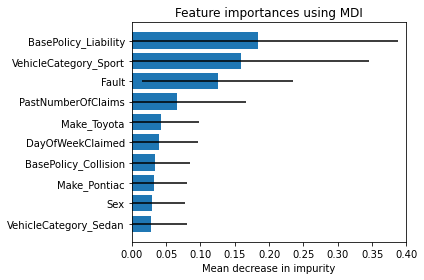

In [128]:
feature_names = [f"feature {i}" for i in range(X_res.shape[1])]
importances = rf_smoth.feature_importances_
std = np.std([tree.feature_importances_ for tree in rf_smoth.estimators_], axis=0)
std = pd.Series(std, index = X_res.columns)
forest_importances = pd.Series(importances, index=X_res.columns)
forest_importances = forest_importances.sort_values(ascending=False)
std = std[forest_importances.index[0:10]]
fig, ax = plt.subplots()
ax.barh(forest_importances.index[0:10], forest_importances[0:10], xerr=std, align='center')
ax.invert_yaxis()  # labels read top-to-bottom
ax.set_title("Feature importances using MDI")
ax.set_xlabel("Mean decrease in impurity")
plt.xlim(0,0.4)
fig.tight_layout()

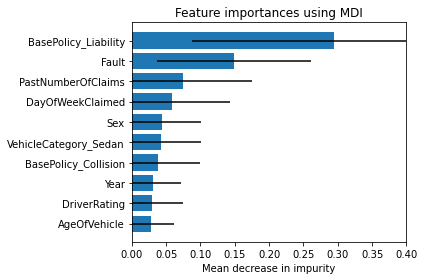

In [136]:
feature_names = [f"feature {i}" for i in range(X_res1.shape[1])]
importances = rf_smoth1.feature_importances_
std = np.std([tree.feature_importances_ for tree in rf_smoth1.estimators_], axis=0)
std = pd.Series(std, index = X_res1.columns)
forest_importances = pd.Series(importances, index=X_res1.columns)
forest_importances = forest_importances.sort_values(ascending=False)
std = std[forest_importances.index[0:10]]
fig, ax = plt.subplots()
ax.barh(forest_importances.index[0:10], forest_importances[0:10], xerr=std, align='center')
ax.invert_yaxis()  # labels read top-to-bottom
ax.set_title("Feature importances using MDI")
ax.set_xlabel("Mean decrease in impurity")
plt.xlim(0,0.4)
fig.tight_layout()

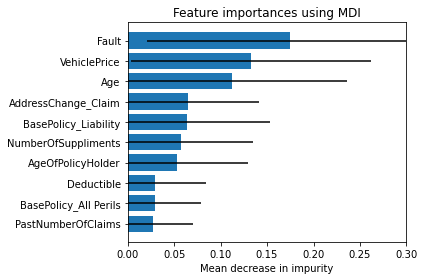

In [48]:
feature_names = [f"feature {i}" for i in range(X_under.shape[1])]
importances = rf_nearmiss.feature_importances_
std = np.std([tree.feature_importances_ for tree in rf_nearmiss.estimators_], axis=0)
std = pd.Series(std, index = X_under.columns)
forest_importances = pd.Series(importances, index=X_under.columns)
forest_importances = forest_importances.sort_values(ascending=False)
std = std[forest_importances.index[0:10]]
fig, ax = plt.subplots()
ax.barh(forest_importances.index[0:10], forest_importances[0:10], xerr=std, align='center')
ax.invert_yaxis()  # labels read top-to-bottom
ax.set_title("Feature importances using MDI")
ax.set_xlabel("Mean decrease in impurity")
plt.xlim(0,0.3)
fig.tight_layout()

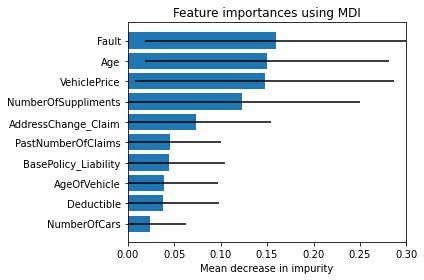

In [47]:
feature_names = [f"feature {i}" for i in range(X_under1.shape[1])]
importances = rf_nearmiss1.feature_importances_
std = np.std([tree.feature_importances_ for tree in rf_nearmiss1.estimators_], axis=0)
std = pd.Series(std, index = X_under1.columns)
forest_importances = pd.Series(importances, index=X_under1.columns)
forest_importances = forest_importances.sort_values(ascending=False)
std = std[forest_importances.index[0:10]]
fig, ax = plt.subplots()
ax.barh(forest_importances.index[0:10], forest_importances[0:10], xerr=std, align='center')
ax.invert_yaxis()  # labels read top-to-bottom
ax.set_title("Feature importances using MDI")
ax.set_xlabel("Mean decrease in impurity")
plt.xlim(0,0.3)
fig.tight_layout()

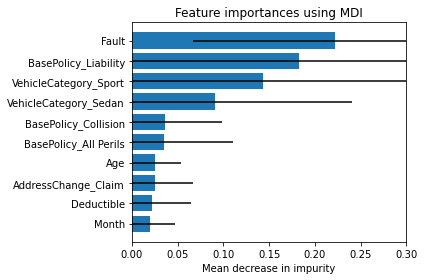

In [56]:
feature_names = [f"feature {i}" for i in range(X_train.shape[1])]
importances = rf_cs.feature_importances_
std = np.std([tree.feature_importances_ for tree in rf_cs.estimators_], axis=0)
std = pd.Series(std, index = X_train.columns)
forest_importances = pd.Series(importances, index=X_train.columns)
forest_importances = forest_importances.sort_values(ascending=False)
std = std[forest_importances.index[0:10]]
fig, ax = plt.subplots()
ax.barh(forest_importances.index[0:10], forest_importances[0:10], xerr=std, align='center')
ax.invert_yaxis()  # labels read top-to-bottom
ax.set_title("Feature importances using MDI")
ax.set_xlabel("Mean decrease in impurity")
plt.xlim(0,0.3)
fig.tight_layout()

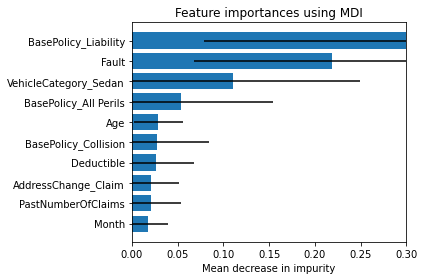

In [137]:
feature_names = [f"feature {i}" for i in range(X_train1.shape[1])]
importances = rf_cs1.feature_importances_
std = np.std([tree.feature_importances_ for tree in rf_cs1.estimators_], axis=0)
std = pd.Series(std, index = X_train1.columns)
forest_importances = pd.Series(importances, index=X_train1.columns)
forest_importances = forest_importances.sort_values(ascending=False)
std = std[forest_importances.index[0:10]]
fig, ax = plt.subplots()
ax.barh(forest_importances.index[0:10], forest_importances[0:10], xerr=std, align='center')
ax.invert_yaxis()  # labels read top-to-bottom
ax.set_title("Feature importances using MDI")
ax.set_xlabel("Mean decrease in impurity")
plt.xlim(0,0.3)
fig.tight_layout()

##### NB- SMOTH

In [78]:
mutual_filter = SelectKBest(mutual_info_classif, k=11)
naiv_b = BernoulliNB(alpha=1)
nb_smoth = make_pipeline(mutual_filter, StandardScaler(), naiv_b)
nb_smoth.fit(X_res, y_res)
nb_smoth_pred = nb_smoth.predict(X_valid)
mutual_filter.feature_names_in_[mutual_filter.get_support(indices=True)]

array(['DayOfWeekClaimed', 'MonthClaimed', 'Age', 'Fault',
       'VehicleCategory_Sport', 'PastNumberOfClaims', 'AgeOfPolicyHolder',
       'NumberOfSuppliments', 'AddressChange_Claim', 'NumberOfCars',
       'BasePolicy_Liability'], dtype=object)

In [109]:
mutual_filter = SelectKBest(mutual_info_classif, k=11)
naiv_b = BernoulliNB(alpha=1)
nb_smoth1 = make_pipeline(mutual_filter, StandardScaler(), naiv_b)
nb_smoth1.fit(X_res1, y_res1)
nb_smoth1_pred = nb_smoth1.predict(X_valid1)
mutual_filter.feature_names_in_[mutual_filter.get_support(indices=True)]

array(['DayOfWeekClaimed', 'MonthClaimed', 'Age', 'Fault',
       'VehicleCategory_Sport', 'PastNumberOfClaims', 'AgeOfPolicyHolder',
       'NumberOfSuppliments', 'AddressChange_Claim', 'NumberOfCars',
       'BasePolicy_Liability'], dtype=object)

##### NB- NearMiss

##### NB- CS

#### SVM - SMOTH

In [60]:
mutual_filter = SelectKBest(mutual_info_classif, k=12)
svm = SVC(gamma='auto')
svm_smoth = make_pipeline(mutual_filter, StandardScaler(), svm)
svm_smoth.fit(X_res, y_res)
svm_smoth_pred = svm_smoth.predict(X_valid)
mutual_filter.feature_names_in_[mutual_filter.get_support(indices=True)]

array(['DayOfWeekClaimed', 'MonthClaimed', 'Sex', 'Age', 'Fault',
       'VehicleCategory_Sport', 'PastNumberOfClaims', 'AgeOfPolicyHolder',
       'NumberOfSuppliments', 'AddressChange_Claim', 'NumberOfCars',
       'BasePolicy_Liability'], dtype=object)

In [107]:
mutual_filter = SelectKBest(mutual_info_classif, k=12)
svm = SVC(gamma='auto')
svm_smoth1 = make_pipeline(mutual_filter, StandardScaler(), svm)
svm_smoth1.fit(X_res1, y_res1)
svm_smoth1_pred = svm_smoth1.predict(X_valid1)
mutual_filter.feature_names_in_[mutual_filter.get_support(indices=True)]

array(['DayOfWeekClaimed', 'MonthClaimed', 'Age', 'Fault',
       'VehicleCategory_Sport', 'PastNumberOfClaims', 'AgeOfPolicyHolder',
       'NumberOfSuppliments', 'AddressChange_Claim', 'NumberOfCars',
       'Year', 'BasePolicy_Liability'], dtype=object)

#### SVM - NearMiss

In [65]:
mutual_filter = SelectKBest(mutual_info_classif, k=14)
svm = SVC(gamma='auto')
svm_nearmiss = make_pipeline(mutual_filter, StandardScaler(), svm)
svm_nearmiss.fit(X_under, y_under)
svm_nearmiss_pred = svm_nearmiss.predict(X_valid)
mutual_filter.feature_names_in_[mutual_filter.get_support(indices=True)]

array(['DayOfWeek', 'MonthClaimed', 'WeekOfMonthClaimed', 'Age', 'Fault',
       'VehicleCategory_Sport', 'VehiclePrice', 'Deductible',
       'PastNumberOfClaims', 'AgeOfVehicle', 'AgeOfPolicyHolder',
       'NumberOfSuppliments', 'AddressChange_Claim',
       'BasePolicy_Liability'], dtype=object)

In [68]:
mutual_filter = SelectKBest(mutual_info_classif, k=14)
svm = SVC(gamma='auto')
svm_nearmiss1 = make_pipeline(mutual_filter, StandardScaler(), svm)
svm_nearmiss1.fit(X_under1, y_under1)
svm_nearmiss1_pred = svm_nearmiss1.predict(X_valid1)
mutual_filter.feature_names_in_[mutual_filter.get_support(indices=True)]

array(['DayOfWeek', 'MaritalStatus_Divorced', 'Age', 'Fault',
       'VehicleCategory_Sport', 'VehicleCategory_Sedan', 'VehiclePrice',
       'Deductible', 'PastNumberOfClaims', 'AgeOfVehicle',
       'WitnessPresent', 'NumberOfSuppliments', 'AddressChange_Claim',
       'BasePolicy_Liability'], dtype=object)

#### SVM - CS

In [72]:
mutual_filter = SelectKBest(mutual_info_classif, k=14)
svm = SVC(gamma='auto', class_weight = {0:1 , 1:20})
svm_cs = make_pipeline(mutual_filter, StandardScaler(), svm)
svm_cs.fit(X_train, y_train)
svm_cs_pred = svm_cs.predict(X_valid)
mutual_filter.feature_names_in_[mutual_filter.get_support(indices=True)]

array(['Month', 'Make_Mercury', 'Make_Lexus', 'DayOfWeekClaimed', 'Sex',
       'Fault', 'VehicleCategory_Sport', 'VehicleCategory_Sedan',
       'Deductible', 'DriverRating', 'PastNumberOfClaims',
       'AgeOfPolicyHolder', 'BasePolicy_Liability',
       'BasePolicy_All Perils'], dtype=object)

In [108]:
mutual_filter = SelectKBest(mutual_info_classif, k=14)
svm = SVC(gamma='auto', class_weight = {0:1 , 1:20})
svm_cs1 = make_pipeline(mutual_filter, StandardScaler(), svm)
svm_cs1.fit(X_train1, y_train1)
svm_cs1_pred = svm_cs1.predict(X_valid1)
mutual_filter.feature_names_in_[mutual_filter.get_support(indices=True)]


array(['Month', 'Sex', 'Fault', 'VehicleCategory_Sport',
       'VehicleCategory_Sedan', 'Deductible', 'Days_Policy_Accident',
       'AgentType', 'AddressChange_Claim', 'NumberOfCars', 'Year',
       'BasePolicy_Liability', 'BasePolicy_Collision',
       'BasePolicy_All Perils'], dtype=object)

#### (5.2) measures

In [39]:
def eval_pref(pred, y, classifier, model):
    precision, recall, thresholds = precision_recall_curve(y, pred)
    auc1 = auc(recall, precision)
    print(model,':')
    print('Accuarcy: ', accuracy_score(y,pred))
    print('Roc_Auc: ', roc_auc_score(y,pred))
    print('G-mean: ', geometric_mean_score(y,pred))
    print('F1-score: ', f1_score(y,pred))
    print('F2-score: ', fbeta_score(y, pred, beta=0.5))
    print('AUC-PR: ', auc1)
    cm = confusion_matrix(y, pred, labels=classifier.classes_)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=['Not Fraud', 'Fraud'])
    disp.plot()

RF :
Accuarcy:  0.9410048622366288
Roc_Auc:  0.5
G-mean:  0.0
F1-score:  0.0
F2-score:  0.0
AUC-PR:  0.5294975688816855


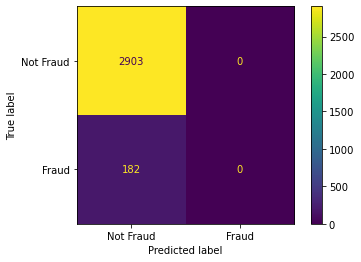

In [71]:
eval_pref(rf_pred, y_valid, rf, 'RF')

RF-SMOTH :
Accuarcy:  0.7251215559157212
Roc_Auc:  0.673692996634781
G-mean:  0.6711649472303634
F1-score:  0.20895522388059704
F2-score:  0.14965259219668625
AUC-PR:  0.38195887480756274


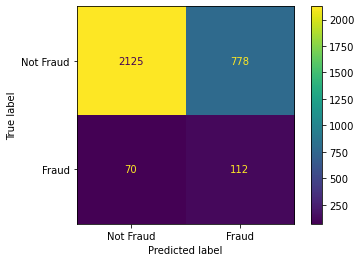

In [40]:
eval_pref(rf_smoth_pred, y_valid, rf_smoth, 'RF-SMOTH')

RF-SMOTH1 :
Accuarcy:  0.7306320907617504
Roc_Auc:  0.6843460535331014
G-mean:  0.6823309964555735
F1-score:  0.2167766258246937
F2-score:  0.15548945375878853
AUC-PR:  0.39220830566796133


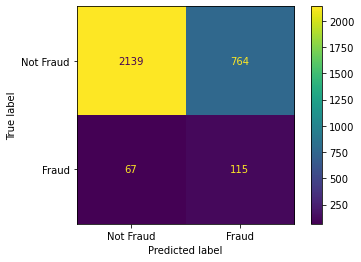

In [138]:
eval_pref(rf_smoth1_pred, y_valid1, rf_smoth1, 'RF-SMOTH1')

RF-NearMiss :
Accuarcy:  0.506320907617504
Roc_Auc:  0.6578596222929671
G-mean:  0.635027844644576
F1-score:  0.16547945205479453
F2-score:  0.11178560852827954
AUC-PR:  0.46581200188562505


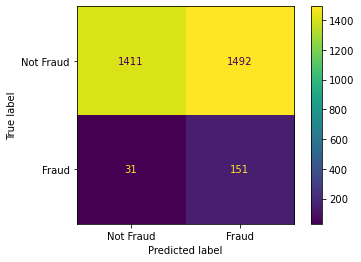

In [50]:
eval_pref(rf_nearmiss_pred, y_valid, rf_nearmiss, 'RF-NearMiss')

RF-NearMiss1 :
Accuarcy:  0.4392220421393841
Roc_Auc:  0.6119067807838046
G-mean:  0.5797395413652228
F1-score:  0.14525691699604742
F2-score:  0.09735099337748343
AUC-PR:  0.4494210433767712


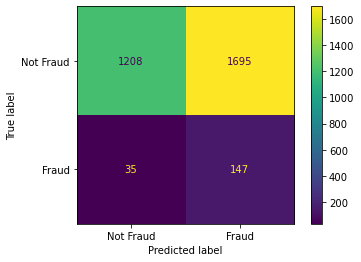

In [52]:
eval_pref(rf_nearmiss1_pred, y_valid1, rf_nearmiss1, 'RF-NearMiss1')

RF-CS :
Accuarcy:  0.5889789303079417
Roc_Auc:  0.7532800475446013
G-mean:  0.7298838575960032
F1-score:  0.2124223602484472
F2-score:  0.14506277570410586
AUC-PR:  0.5314369894572964


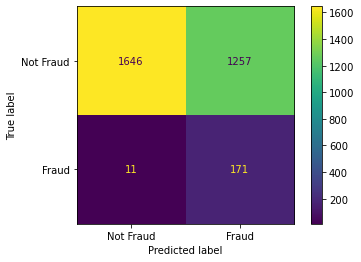

In [139]:
eval_pref(rf_cs_pred, y_valid, rf_cs, 'RF-CS')

RF-CS :
Accuarcy:  0.5893030794165316
Roc_Auc:  0.7534522831629273
G-mean:  0.7301055383475372
F1-score:  0.21255438160348045
F2-score:  0.14516129032258063
AUC-PR:  0.5314789473757126


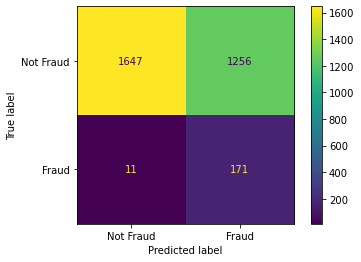

In [140]:
eval_pref(rf_cs1_pred, y_valid1, rf_cs1, 'RF-CS')

SVM-SMOTH :
Accuarcy:  0.6897893030794165
Roc_Auc:  0.72186975958936
G-mean:  0.7209528608193676
F1-score:  0.22384428223844283
F2-score:  0.1573187414500684
AUC-PR:  0.451903919738212


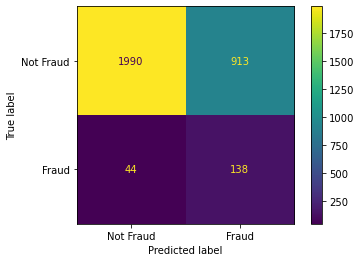

In [63]:
eval_pref(svm_smoth_pred, y_valid, svm_smoth, 'SVM-SMOTH')

SVM-SMOTH1 :
Accuarcy:  0.7027552674230146
Roc_Auc:  0.7210341329356141
G-mean:  0.7207362431373359
F1-score:  0.22746419545071608
F2-score:  0.16063779152784385
AUC-PR:  0.4456608040354623


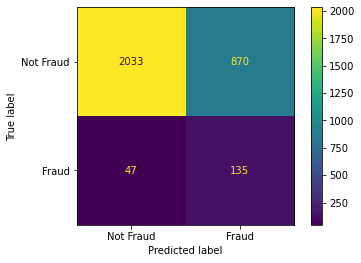

In [112]:
eval_pref(svm_smoth1_pred, y_valid1, svm_smoth1, 'SVM-SMOTH1')

SVM-NearMiss :
Accuarcy:  0.4392220421393841
Roc_Auc:  0.5655564724631208
G-mean:  0.5471178427486639
F1-score:  0.12977867203219315
F2-score:  0.08709154739400483
AUC-PR:  0.39869984148752385


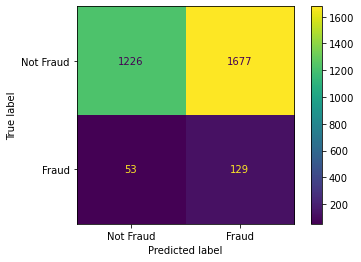

In [69]:
eval_pref(svm_nearmiss_pred, y_valid, svm_nearmiss, 'SVM-NearMiss')

SVM-NearMiss1 :
Accuarcy:  0.5066450567260941
Roc_Auc:  0.5679062583988522
G-mean:  0.5636429097840432
F1-score:  0.13226909920182442
F2-score:  0.08964451313755796
AUC-PR:  0.3662739135650415


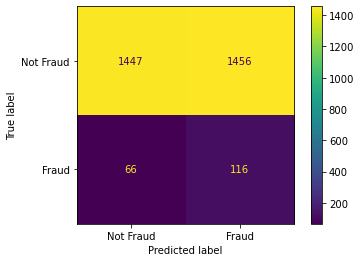

In [70]:
eval_pref(svm_nearmiss1_pred, y_valid1, svm_nearmiss1, 'SVM-NearMiss1')

SVM-CS :
Accuarcy:  0.6022690437601297
Roc_Auc:  0.7371665537356202
G-mean:  0.7211261081150494
F1-score:  0.20889748549323015
F2-score:  0.14316012725344648
AUC-PR:  0.5074637115243362


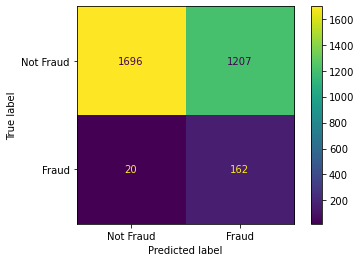

In [75]:
eval_pref(svm_cs_pred, y_valid, svm_cs, 'SVM-CS')

SVM-CS1 :
Accuarcy:  0.6084278768233388
Roc_Auc:  0.7507390989995192
G-mean:  0.7331955777837021
F1-score:  0.2155844155844156
F2-score:  0.14784467402921267
AUC-PR:  0.5197564419907317


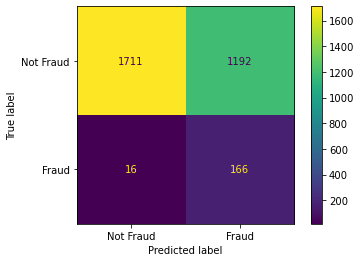

In [113]:
eval_pref(svm_cs1_pred, y_valid1, svm_cs1, 'SVM-CS1')

NB-SMOTH :
Accuarcy:  0.6197730956239871
Roc_Auc:  0.7052670030623871
G-mean:  0.6985742378499017
F1-score:  0.1993174061433447
F2-score:  0.13737297704177645
AUC-PR:  0.46383148061080787


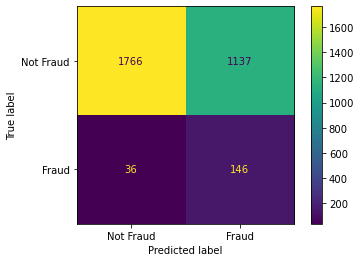

In [100]:
eval_pref(nb_smoth_pred, y_valid, nb_smoth, 'NB-SMOTH')

NB-SMOTH1 :
Accuarcy:  0.6204213938411669
Roc_Auc:  0.7056114742990389
G-mean:  0.6989696945687244
F1-score:  0.1995898838004101
F2-score:  0.13758009800226156
AUC-PR:  0.4639203141713969


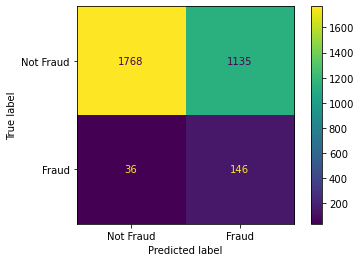

In [114]:
eval_pref(nb_smoth1_pred, y_valid1, nb_smoth1, 'NB-SMOTH1')